# final-project - Xbox Game Suggestion
<img src = "https://compass-ssl.xbox.com/assets/5e/97/5e9747c7-abdc-4179-853d-da0c85000712.jpg" width="1000">

Due to the internal structure of BestBuy's databases, there is no guarantee that the user clicks resulted from a search with the given query. 

hat we do know is that the user made a query at query_time, and then, at click_time, they clicked on the sku, but we don't know that the click came from the search results. The click_time is never more than five minutes after the query_time.

In addition, there is information about these xbox products in small_product_data.xml.

We have also provided a sample benchmark submission and the code that produces it. popular_skus.py is a simple python script that predicts that each user clicked on one of the five most popular xbox skus. This script produces the benchmark in popular_skus.csv. Note that all of the predictions in popular_skus.csv are the same.

The syntax of a submission should be the same as that in popular_skus.csv: A file with the header "sku", and each of the following lines containing the space-delimited estimates of the clicked sku that resulted after the queries in test.csv, and in the same order.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
!pip install numpy pandas matplotlib seaborn plotly --quiet

In [3]:
!pip install opendatasets graphviz scikit-learn xgboost lightgbm --upgrade --quiet

In [4]:
import jovian

In [5]:
# Execute this to save new versions of the notebook
jovian.commit(project="final-project")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mohlapokt/final-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mohlapokt/final-project


'https://jovian.ai/mohlapokt/final-project'

# Dowloading the dataset

In [6]:
import opendatasets as od
import pandas as pd
import os

In [7]:
od.download('https://www.kaggle.com/c/acm-sf-chapter-hackathon-small')
#name - thomaskarabomohlapo
#key - e91246726694e1adf2b1417e3725d407

Skipping, found downloaded files in "./acm-sf-chapter-hackathon-small" (use force=True to force download)


In [8]:
os.listdir('acm-sf-chapter-hackathon-small')

['test.csv',
 'train.csv',
 'popular_skus.py',
 'popular_skus.csv',
 'small_product_data.xml']

In [9]:
train_data = pd.read_csv('acm-sf-chapter-hackathon-small/train.csv')

In [10]:
test_data = pd.read_csv('acm-sf-chapter-hackathon-small/test.csv')

Let's save before continuing

In [11]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mohlapokt/final-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mohlapokt/final-project


'https://jovian.ai/mohlapokt/final-project'

# Data Analysis and Visualization

In [12]:
train_data

,user,sku,category,query,click_time,query_time
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,gears of war,2011-10-09 17:22:56.101,2011-10-09 17:21:42.917
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,Gears of war,2011-09-25 13:36:08.668,2011-09-25 13:35:33.234
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,Assassin creed,2011-09-25 13:37:23.709,2011-09-25 13:37:00.049
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,dead island,2011-09-11 15:15:34.336,2011-09-11 15:15:26.206
...,...,...,...,...,...,...
42360,fff95d849a4d9c9946e081459471adf4a7192d79,2670133,abcat0701002,Modern warfare 3,2011-09-27 22:53:29.344,2011-09-27 22:53:04.644
42361,fffa393d127dec90b7eae4718535bd16be3b394d,2173065,abcat0701002,Batman,2011-10-14 12:44:14.669,2011-10-14 12:44:07.004
42362,fffa393d127dec90b7eae4718535bd16be3b394d,3046603,abcat0701002,Batman,2011-10-14 12:44:31.228,2011-10-14 12:44:07.004
42363,fffd288ec29a96dbac7356bcda0a1e9f88255a5b,2340293,abcat0701002,360 games,2011-10-10 08:46:10.368,2011-10-10 08:43:56.768


In [13]:
test_data

,user,category,query,click_time,query_time
0,00025eb02b249434554fe2cacd8562db325df127,abcat0701002,child eden,2011-09-02 13:05:24.146,2011-09-02 13:04:34.633
1,00033dbced6acd3626c4b56ff5c55b8d69911681,abcat0701002,Revelations,2011-09-25 13:38:14.74,2011-09-25 13:37:58.382
2,000548d17532b70071b7d59edd4797aed1823c60,abcat0701002,Gears of war,2011-09-16 17:34:43.596,2011-09-16 17:33:43.237
3,0006f15231a422156a9d005735d0969a5e5a0ac4,abcat0701002,batman,2011-10-09 11:14:48.352,2011-10-09 11:14:33.692
4,000a16ce5371b0fb3ad0c7f6183a5476b434a95b,abcat0701002,Assassins creed: revelations,2011-09-05 00:31:53.083,2011-09-05 00:31:39.761
...,...,...,...,...,...
28236,fff90d259bc0e6d25f52270efa6ffe39cbb3f4ec,abcat0701002,Hunted,2011-09-05 09:59:15.54,2011-09-05 09:59:09.478
28237,fffa50e2b4675b457e86e1c756ed85c4d2bdf5e0,abcat0701002,Need for speed,2011-08-30 11:27:03.175,2011-08-30 11:26:06.227
28238,fffa95be88e8210312518a884d14e39e13d727eb,abcat0701002,Rocksmith,2011-10-25 17:41:14.568,2011-10-25 17:41:05.683
28239,fffb154d387316747181e5d647c0b7eac8f6e064,abcat0701002,Dead island,2011-09-14 11:16:11.579,2011-09-14 11:14:41.861


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42365 entries, 0 to 42364
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user        42365 non-null  object
 1   sku         42365 non-null  int64 
 2   category    42365 non-null  object
 3   query       42365 non-null  object
 4   click_time  42365 non-null  object
 5   query_time  42365 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.9+ MB


In [15]:
train_data.describe()

,sku
count,4.236500e+04
mean,2.360281e+11
std,4.858031e+13
min,1.004622e+06
25%,2.173065e+06
50%,2.670133e+06
75%,3.046603e+06
max,9.999169e+15


In [16]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

from sklearn.metrics import mean_squared_error
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score

# Cleaning and Feature engineering of the data.

In [17]:
X = train_data.drop(['user', 'sku', 'category'],axis=1)
y = train_data.sku

In [18]:
from datetime import datetime

X.click_time = X[['click_time']].transform(lambda x: x + '.' + '0' * 6 if len(x) == 19  else x + (26 - len(x)) * '0')
X.query_time = X[['query_time']].transform(lambda x: x + '.' + '0' * 6 if len(x) == 19  else x + (26 - len(x)) * '0')

X = X.transform({'query': (lambda x: x.lower()), 'click_time':(lambda time: int(''.join(c for c in time if c.isdigit()))), \
                'query_time': (lambda time: int(''.join(c for c in time if c.isdigit())))})

In [19]:
query_type = X['query'].unique()
query_size = X['query'].nunique()
query_dict = {query_type[i]: i for i in range(query_size)}
query_dict['ncaa 2011']

959

In [20]:
X = X.transform({'query': (lambda x: query_dict[x]), 'click_time': (lambda x: x), 'query_time' : (lambda x: x)})

In [21]:
X

,query,click_time,query_time
0,0,20111009172256101,20111009172142917
1,0,20110925133542198,20110925133533234
2,0,20110925133608668,20110925133533234
3,1,20110925133723709,20110925133700049
4,2,20110911151534336,20110911151526206
...,...,...,...
42360,16,20110927225329344,20110927225304644
42361,45,20111014124414669,20111014124407004
42362,45,20111014124431228,20111014124407004
42363,2294,20111010084610368,20111010084356768


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Let's save before continuing

In [23]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mohlapokt/final-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mohlapokt/final-project


'https://jovian.ai/mohlapokt/final-project'

# Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
linear_model = LinearRegression()

In [26]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [27]:
l_pred = linear_model.predict(X_train)

In [28]:
def rmse(l_pred, target):
    return mean_squared_error(l_pred, target, squared=False)

In [29]:
def n_describe(l_pred, target, inputs, n_model):
    print('RMSE Loss is :',rmse(l_pred, target), 'Accuracy is :',n_model.score(inputs, target)*100,'%')

In [30]:
n_describe(l_pred, y_train, X_train, linear_model)

RMSE Loss is : 56093989865006.82 Accuracy is : 0.005358106733344137 %


### Feature importance

## Hypertunning and Choosing best Model

Lets save before continuing

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mohlapokt/final-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mohlapokt/final-project


'https://jovian.ai/mohlapokt/final-project'

# Decision Tree

A decision tree in general parlance represents a hierarchical series of binary decisions:

<img src="https://i.imgur.com/qSH4lqz.png" width="480">

A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
tree_model = DecisionTreeRegressor(random_state=42)

In [34]:
%%time
tree_model.fit(X_train, y_train)

CPU times: user 65.1 ms, sys: 1.08 ms, total: 66.2 ms
Wall time: 65.3 ms


DecisionTreeRegressor(random_state=42)

In [35]:
t_pred = tree_model.predict(X_train)

In [36]:
def rmse(t_pred, target):
    return mean_squared_error(t_pred, target, squared=False)

In [37]:
def n_describe(t_pred, target, inputs, n_model):
    print('RMSE Loss is :',rmse(t_pred, target), 'Accuracy is :',n_model.score(inputs, target)*100,'%')

In [38]:
n_describe(t_pred, y_train, X_train, tree_model)

RMSE Loss is : 1494846.7423944443 Accuracy is : 99.99999999999993 %


### Feature importance

In [39]:
importance_tr = pd.DataFrame({
    'feature' : X_train.columns,
    'importance' : tree_model.feature_importances_
}).sort_values('importance' , ascending=False)

In [40]:
importance_tr.head(10)

,feature,importance
0,query,9.989952e-01
2,query_time,1.004828e-03
1,click_time,2.598679e-16


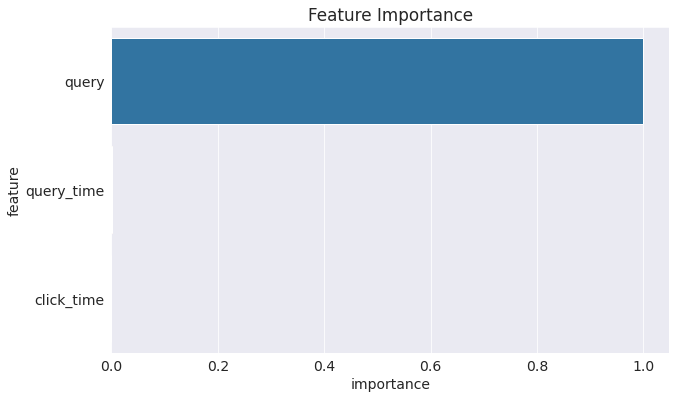

In [41]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_tr.head(10), x='importance', y='feature');

## Hypertunning and Choosing best Model

In [42]:
def max_depth_error(md):
    tree_model = DecisionTreeRegressor(max_depth=md, random_state=42)
    tree_model.fit(X_train, y_train)
    train_acc = 1 - tree_model.score(X_train, y_train)
    val_acc = 1 - tree_model.score(X_test, y_test)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [43]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])
print(errors_df)

    Max Depth  Training Error  Validation Error
0           1    9.989952e-01      3.720111e+11
1           2    9.904158e-01      3.005961e+12
2           3    2.553513e-15      1.121120e+15
3           4    2.442491e-15      1.121120e+15
4           5    2.220446e-15      1.121120e+15
5           6    2.109424e-15      1.121120e+15
6           7    1.998401e-15      1.121120e+15
7           8    1.887379e-15      1.121120e+15
8           9    1.776357e-15      1.121120e+15
9          10    1.776357e-15      1.121120e+15
10         11    1.665335e-15      1.121120e+15
11         12    1.554312e-15      1.121120e+15
12         13    1.443290e-15      1.121120e+15
13         14    1.443290e-15      1.121120e+15
14         15    1.332268e-15      1.121120e+15
15         16    1.332268e-15      1.121120e+15
16         17    1.221245e-15      1.121120e+15
17         18    1.221245e-15      1.121120e+15
18         19    1.110223e-15      1.121120e+15
19         20    1.110223e-15      1.121

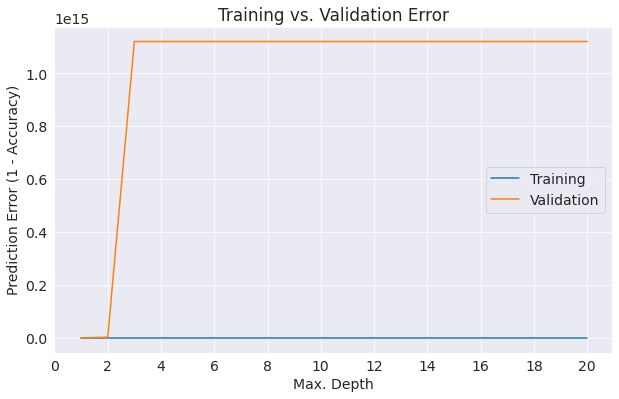

In [44]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

Let's save before continuing

In [45]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mohlapokt/final-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mohlapokt/final-project


'https://jovian.ai/mohlapokt/final-project'

# Random Forest

A random forest works by averaging/combining the results of several decision trees:

<img src="https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width="640">


We'll use the `RandomForestClassifier` class from `sklearn.ensemble`.

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
forest_model = RandomForestRegressor(n_jobs=-1, random_state=42)

In [48]:
%%time
forest_model.fit(X_train, y_train)

CPU times: user 5.1 s, sys: 73.3 ms, total: 5.17 s
Wall time: 2.68 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [49]:
f_pred = forest_model.predict(X_train)

In [50]:
def rmse(f_pred, target):
    return mean_squared_error(f_pred, target, squared=False)

In [51]:
def n_describe(f_pred, target, inputs, n_model):
    print('RMSE Loss is :',rmse(f_pred, target), 'Accuracy is :',n_model.score(inputs, target)*100,'%')

In [52]:
n_describe(f_pred, y_train, X_train, forest_model)

RMSE Loss is : 26161607888540.246 Accuracy is : 78.24931542771736 %


### Feature Importance

In [53]:
importance_fr = pd.DataFrame({
    'feature' : X_train.columns,
    'importance' : forest_model.feature_importances_
}).sort_values('importance' , ascending=False)

In [54]:
importance_fr.head(10)

,feature,importance
0,query,0.899325
1,click_time,0.054356
2,query_time,0.046319


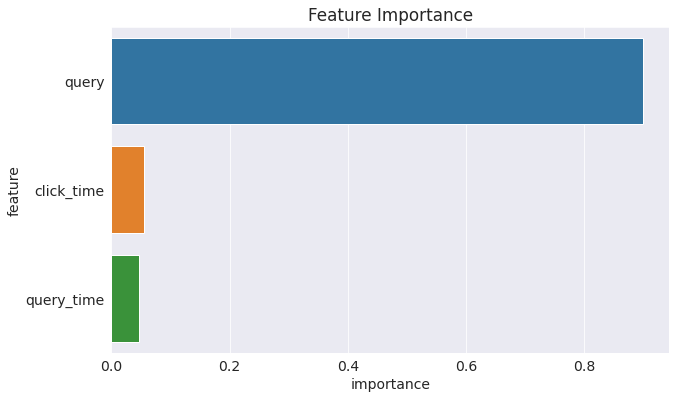

In [55]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_fr.head(10), x='importance', y='feature');

## Hypertunning and Choosing best Model

In [56]:
forest_model = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=500)

In [57]:
forest_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)

In [58]:
forest_model.score(X_train, y_train), forest_model.score(X_test, y_test)

(0.7845892202523037, -433281434552436.6)

Let's save before continuing

In [59]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mohlapokt/final-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mohlapokt/final-project


'https://jovian.ai/mohlapokt/final-project'

# XGBoost model

 
> <img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

In [60]:
from xgboost import XGBRegressor

In [61]:
xgb_model = XGBRegressor(random_state=42, n_jobs=-1, max_depth=4, n_estimators=20)

In [62]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
xgb_pred = xgb_model.predict(X_train)

In [64]:
def rmse(pred, target):
    return mean_squared_error(pred, target, squared=False)

In [65]:
def n_describe(pred, target, inputs, n_model):
    print('RMSE Loss is :',rmse(pred, target), 'Accuracy is :',n_model.score(inputs, target)*100,'%')

In [66]:
n_describe(xgb_pred, y_train, X_train, xgb_model)

RMSE Loss is : 2174267047665.586 Accuracy is : 99.84976544537622 %


### Feature Importance

In [67]:
importance_xgb = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

In [68]:
importance_xgb.head(10)

,feature,importance
0,query,9.834880e-01
2,query_time,1.651201e-02
1,click_time,2.299298e-16


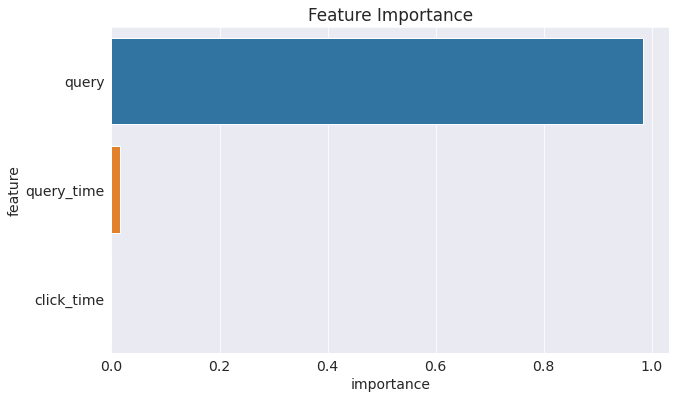

In [69]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_xgb.head(10), x='importance', y='feature');

## Hypertunning and Choosing best Model

In [70]:
def test_params(**params):
    model = XGBRegressor(random_state=42, n_jobs=-1,**params).fit(X_train, y_train)
    train_rmse = mean_squared_error(model.predict(X_train), y_train, squared=False)
    val_rmse = mean_squared_error(model.predict(X_test), y_test, squared=False)
    return train_rmse, val_rmse

In [71]:
def test_and_plot(param_name, param_values):
    train_errors, val_errors = [], []
    for value in param_values:
        params = {param_name : value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

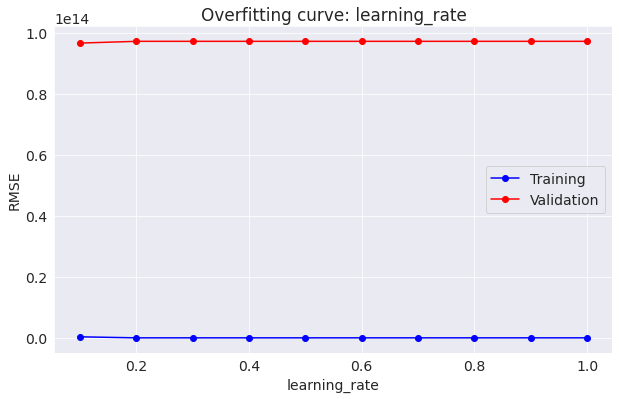

In [72]:
test_and_plot('learning_rate', [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8, 0.9, 1])

In [73]:
jovian.commit(project="final-project")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mohlapokt/final-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mohlapokt/final-project


'https://jovian.ai/mohlapokt/final-project'

## Putting it Together and Making Predictions.

Let's train a final model on the entire training set with custom hyperparameters.

In [74]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=700, 
                     learning_rate=0.4, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)

In [75]:
%%time
model.fit(X, y)

CPU times: user 56.8 s, sys: 185 ms, total: 57 s
Wall time: 29 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.4, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=700, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
test_preds = model.predict(X_test)

In [77]:
output = pd.DataFrame({'Sku': test_preds})
output.to_csv('sku_predict.csv', index=False)

In [78]:
output

,Sku
0,1.203209e+07
1,-1.422057e+06
2,-4.398959e+06
3,-5.087106e+06
4,1.965147e+08
...,...
10587,1.670238e+07
10588,-1.401248e+07
10589,1.304062e+07
10590,4.631098e+07


In [80]:
jovian.commit(project="final-project")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mohlapokt/final-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mohlapokt/final-project


'https://jovian.ai/mohlapokt/final-project'

## Saving and submitting

Let's summarise the work we have done in this project:-

Downloading a real-world dataset from a Kaggle competition.

Analyze the data see which columns are useful.

Performing feature engineering and prepare the dataset for training.

Training 4 different models and using hypertunning to see which model is best.

Training the final model and predicting values.

Saving the model results into a new csv file called output.

Below are the sites which I have gone through while working on the project.

https://stackoverflow.com/questions/3451111/unzipping-files-in-python
https://towardsdatascience.com/️-load-the-same-csv-file-10x-times-faster-and-with-10x-less-memory-️-e93b485086c7
https://stackoverflow.com/questions/3451111/unzipping-files-in-python 
https://seaborn.pydata.org/generated/seaborn.heatmap.html 
https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html https://plotly.com/python/log-plot/ https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html https://plotly.com/python/bar-charts/ 
 https://stackoverflow.com/questions/34794067/how-to-set-a-cell-to-nan-in-a-pandas-dataframe https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.convert_dtypes.html 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html https://stackoverflow.com/questions/21491291/remove-all-quotes-within-values-in-pandas https://stackoverflow.com/questions/40705480/python-pandas-remove-everything-after-a-delimiter-in-a-string https://stackoverflow.com/questions/46406720/labelencoder-typeerror-not-supported-between-instances-of-float-and-str https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/
https://www.youtube.com/c/Siddhardhan
https://www.youtube.com/c/joshstarmer

In [ ]:
jovian.commit(project="final-project")

<IPython.core.display.Javascript object>